In [7]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('./training_checkpoints/best_model.keras')

In [8]:
import cv2
import numpy as np

# Load the gauge image
image_path = '/Users/faizal/work/gnprc-domi-app/Model/guage_image1.jpg'
image = cv2.imread(image_path)

# Resize to the model's input size (e.g., 224x224 or your model's requirement)
input_size = (224, 224)  # Adjust based on your model
resized_image = cv2.resize(image, input_size)

# Normalize pixel values if required (e.g., scale to [0, 1])
normalized_image = resized_image / 255.0

# Add batch dimension
input_image = np.expand_dims(normalized_image, axis=0)  # Shape: (1, height, width, channels)

In [9]:
# Predict the value
predictions = model.predict(input_image)

# Interpret the output
print("Predicted Value:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Value: [[0.9022496]]


In [12]:
# Example: Map angle to gauge value
min_value = 0  # Minimum value of the gauge scale
max_value = 10  # Maximum value of the gauge scale
predicted_value = predictions[0][0]  # Extract the value from the prediction array
gauge_reading = min_value + (predicted_value * (max_value - min_value))
print("Gauge Reading:", gauge_reading)

Gauge Reading: 9.022495746612549


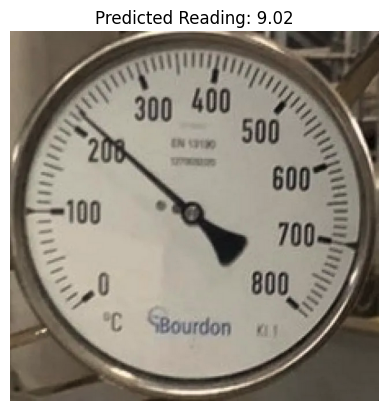

In [13]:
import matplotlib.pyplot as plt

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Reading: {gauge_reading:.2f}")
plt.axis('off')
plt.show()